110503504林巧翎

# **作業二、Kaggle自選競賽參賽紀錄**

比賽名稱 : Spaceship Titanic

比賽簡介 :


> 在2912年，數據科學技能成為解開宇宙之謎的關鍵。來自四光年外的傳輸顯示“泰坦尼克號”星際客輪在半人馬座附近發現時空異常，將近一半的13000名乘客被傳送到另一維度。受損的計算機系統提供的記錄成為預測受影響乘客的關鍵。我們的任務是挑戰預測，協助救援隊伍找回失踪的乘客。

為甚麼選擇這個比賽?


> 由於這是我第一次進行機器學習的實作，因此我認為從老師上課教的範例做延伸學習，比較不會有壓力，因此我就選擇相近的Spaceship Titanic資料集，這樣可以有效的複習老師上課所教的內容。



資料集描述 :


> **train.csv** - 訓練數據，約8700人，總乘客的三分之二
*   PassengerId - 每位乘客的唯一ID。
*   HomePlanet - 乘客出發的星球，通常是他們的永久居住星球。形式為gggg_pp，其中gggg表示乘客所在的組，pp是他們在組內的編號。組內的人通常是家庭成員，但也不一定是。
*   CryoSleep - 指示乘客是否選擇在航程期間處於假死狀態。處於冷凍睡眠狀態的乘客被限制在自己的客艙內。
*   Cabin - 乘客所住的艙室號。格式為deck/num/side。
*   Destination - 乘客將要下船的星球。
*   Age
*   VIP - 乘客是否支付了航程期間的特殊VIP服務。
*   RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 乘客在“泰坦尼克號”上的許多豪華設施中每項的費用。
*   Name
*   ***Transported - 乘客是否被傳送到另一個維度。這是目標，要預測的列。***


任務描述 :
> **test.csv** - 測試數據。
*   約4300人，剩餘三分之一的乘客。
*   預測這組乘客的Transported的值。

提交文件格式 :

> **sample_submission.csv**
*   PassengerId - 測試集中每位乘客的ID。
*   Transported - 目標。對於每位乘客預測True或False。




























In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 一、取得資料與資料觀察

In [190]:
df = pd.read_csv("/content/train.csv")

我們可以觀察到有哪些項目是非數字的，應該要轉成數字呈現較好進行模型訓練，不重要的項目則可以刪除
*  刪除的項目 : PassengerId、Name
*  True and False轉換為1和0 : CryoSleep、VIP、Transported

In [191]:
df.head(100)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0103_01,Earth,False,F/24/S,TRAPPIST-1e,24.0,False,0.0,NaN,0.0,0.0,17.0,Arlen Mclainez,True
96,0103_02,Earth,True,G/18/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Shaele Mclainez,True
97,0103_03,Earth,True,G/18/S,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,Fanne Mclainez,False
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### 二、資料清理
*  刪除的項目 : Name
*  轉換為數字 : Cabin、HomePlanet、CryoSleep、VIP、Transported

In [193]:
df.drop(['Name'],axis=1,inplace=True)
df=pd.get_dummies(data=df, dtype=int, columns=['HomePlanet','CryoSleep','Destination','VIP','Transported'])
df.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,Transported_False,Transported_True
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,1,1,0,1,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,1,0,0,0,1,1,0,0,1
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,1,0,0,0,1,0,1,1,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,1,0,0,0,1,1,0,1,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,1,0,0,0,1,1,0,0,1


*  可刪除 : CryoSleep_False、VIP_False、Transported_False

In [194]:
df.drop(['CryoSleep_False','VIP_False','Transported_False'],axis=1,inplace=True)

In [195]:
df.head()

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True,Transported_True
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,1,0,0,0,0,0,1,0,1
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,0,1,0,0,0,0,1,1,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,0,1,0,0,0,0,1,0,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,1,0,0,0,0,0,1,0,1


觀察每個欄位與Transported_True的相關性

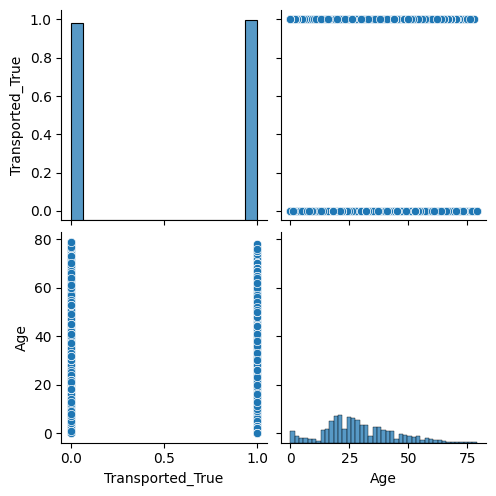

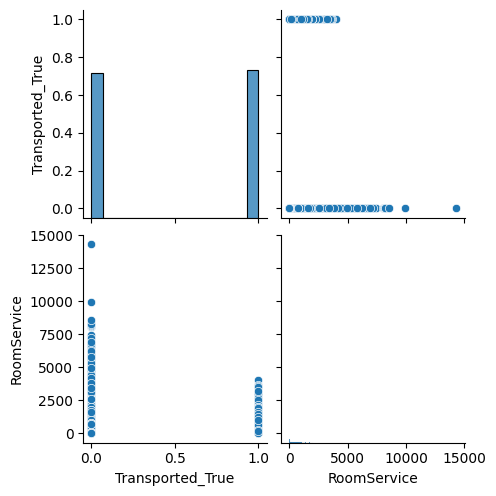

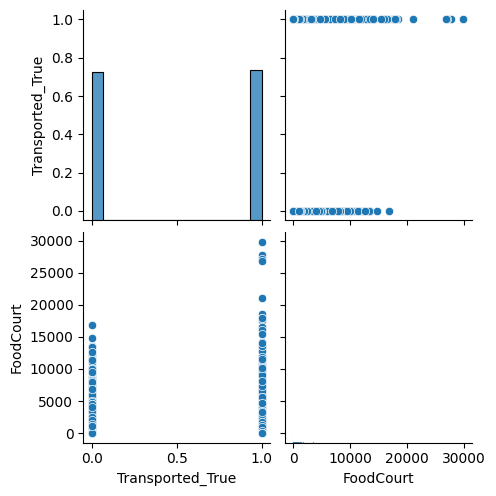

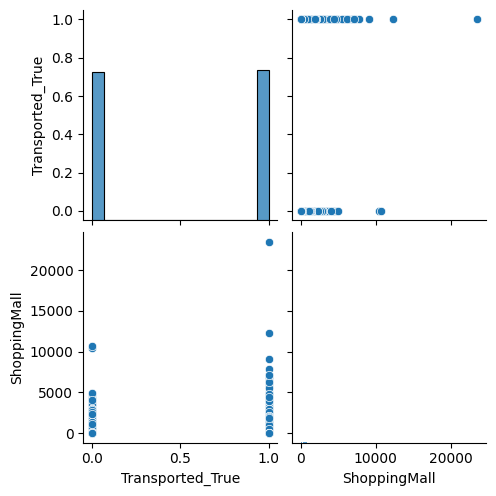

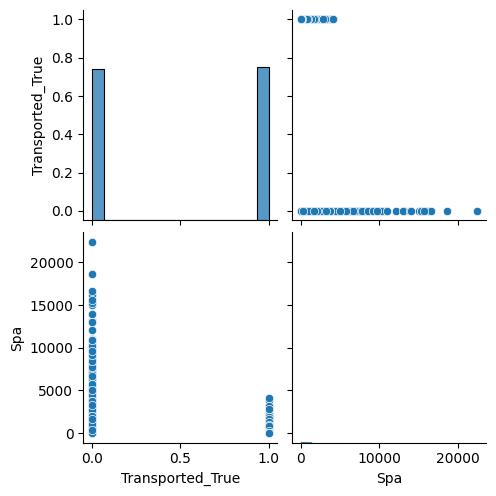

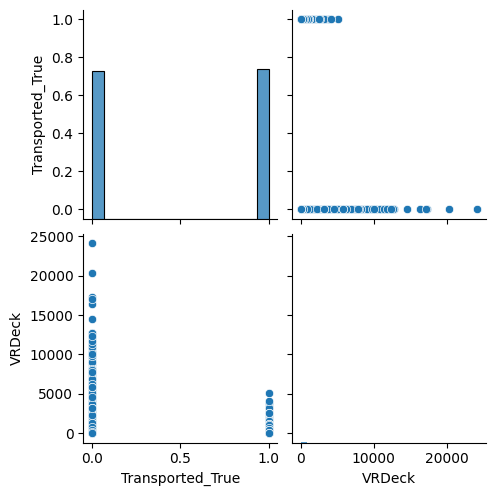

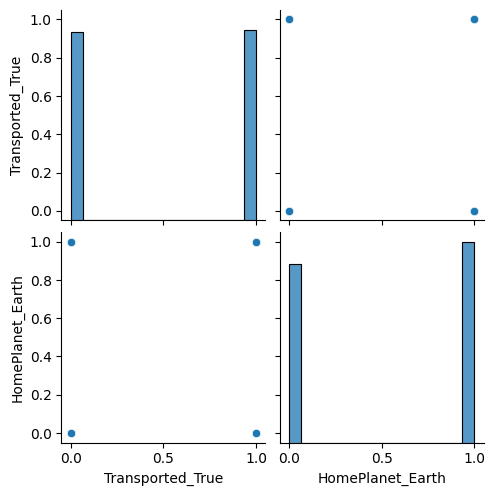

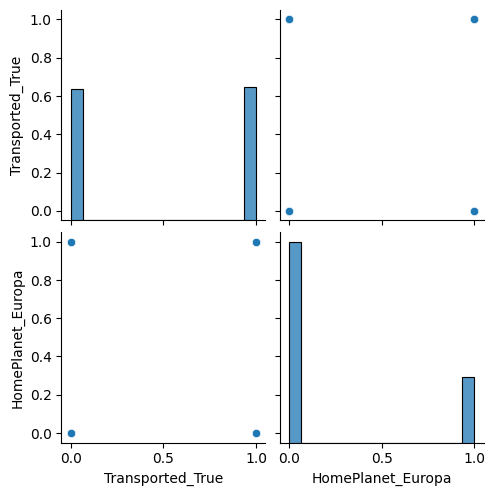

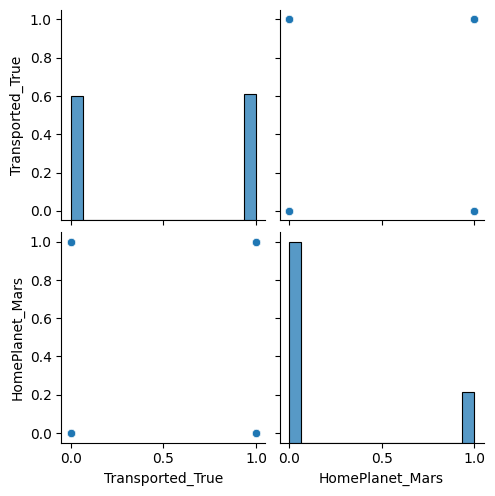

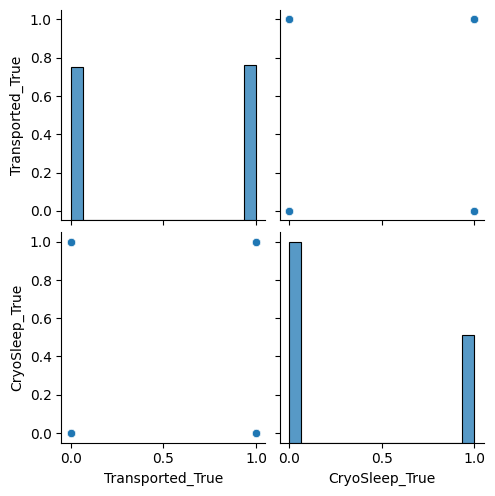

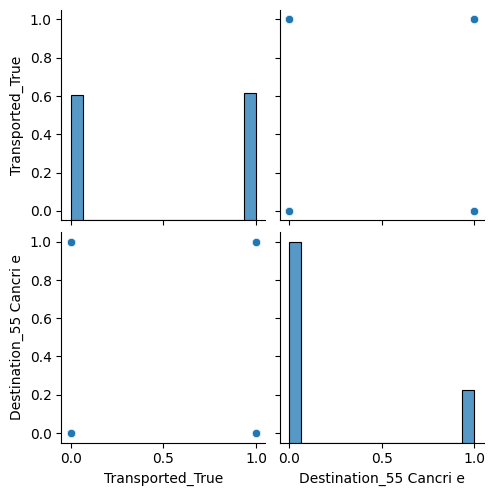

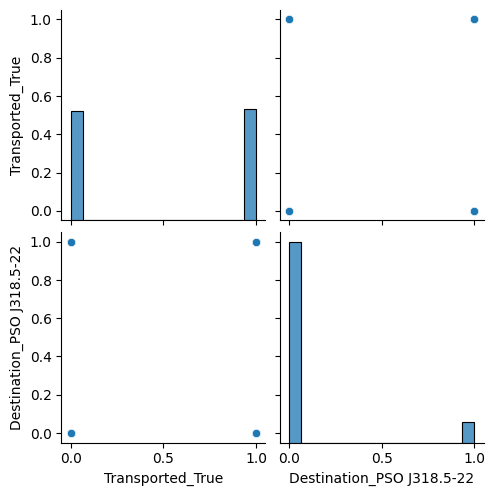

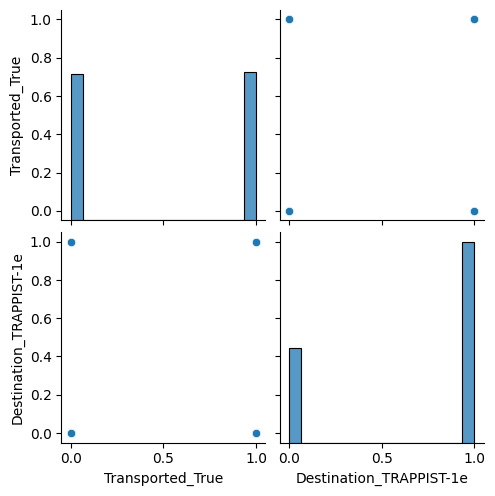

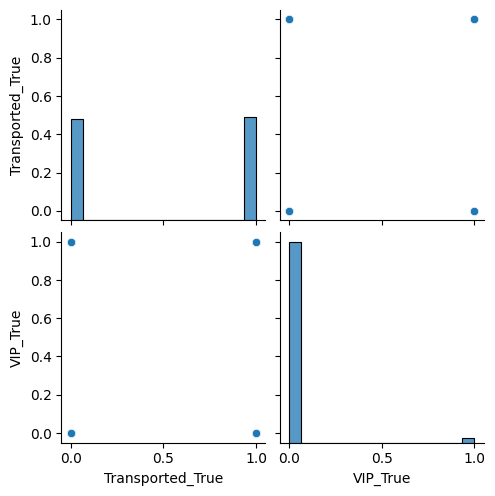

In [198]:
sns.pairplot(df[['Transported_True','Age']],dropna=True)
sns.pairplot(df[['Transported_True','RoomService']],dropna=True)
sns.pairplot(df[['Transported_True','FoodCourt']],dropna=True)
sns.pairplot(df[['Transported_True','ShoppingMall']],dropna=True)
sns.pairplot(df[['Transported_True','Spa']],dropna=True)
sns.pairplot(df[['Transported_True','VRDeck']],dropna=True)
sns.pairplot(df[['Transported_True','HomePlanet_Earth']],dropna=True)
sns.pairplot(df[['Transported_True','HomePlanet_Europa']],dropna=True)
sns.pairplot(df[['Transported_True','HomePlanet_Mars']],dropna=True)
sns.pairplot(df[['Transported_True','CryoSleep_True']],dropna=True)
sns.pairplot(df[['Transported_True','Destination_55 Cancri e']],dropna=True)
sns.pairplot(df[['Transported_True','Destination_PSO J318.5-22']],dropna=True)
sns.pairplot(df[['Transported_True','Destination_TRAPPIST-1e']],dropna=True)
sns.pairplot(df[['Transported_True','VIP_True']],dropna=True)

In [200]:
df.isnull().sum()

PassengerId                    0
Cabin                        199
Age                          179
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_True                 0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
VIP_True                       0
Transported_True               0
dtype: int64

由上課所教的方法，若空值小於總數目的一半則想辦法填補空值，若空值大於總數目的一半則捨去

由於此資料的空值都小於總數的一半，因此要手動填補空值

In [201]:
len(df)
len(df)/2
df.isnull().sum() > len(df)/2

PassengerId                  False
Cabin                        False
Age                          False
RoomService                  False
FoodCourt                    False
ShoppingMall                 False
Spa                          False
VRDeck                       False
HomePlanet_Earth             False
HomePlanet_Europa            False
HomePlanet_Mars              False
CryoSleep_True               False
Destination_55 Cancri e      False
Destination_PSO J318.5-22    False
Destination_TRAPPIST-1e      False
VIP_True                     False
Transported_True             False
dtype: bool

由於Cabin的欄位較難分析，因此我先將Cabin欄位去除

In [202]:
df.drop(['Cabin'],axis=1,inplace=True)

用Age的中位數填補空值

In [203]:
df['Age'] = df['Age'].fillna(df['Age'].median)

In [204]:
df.isnull().sum()

PassengerId                    0
Age                            0
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_True                 0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
VIP_True                       0
Transported_True               0
dtype: int64

剩下有空值的欄位皆是乘客在“泰坦尼克號”上的各項豪華設施中的費用。

我觀察了RoomService, FoodCourt, ShoppingMall, Spa, VRDeck個別與Transported_True作圖，發現RoomService、Spa、VRDeck大概都是數字較小時Transported_True=1，而ShoppingMall、FoodCourt則是呈現相反狀態。

為了減少空值的填補，因此我決定將RoomService、Spa、VRDeck數值相加合併成為一個欄位、而ShoppingMall、FoodCourt合併成為另一個欄位。

In [205]:
df['RoomService'] = df['RoomService'] + df['Spa'] + df['VRDeck']

In [206]:
df['ShoppingMall'] = df['ShoppingMall'] + df['FoodCourt']

現在可以將Spa、VRDeck、FoodCourt去除

In [207]:
df.drop(['Spa','VRDeck','FoodCourt'],axis=1,inplace=True)

In [209]:
df.isnull().sum()

PassengerId                    0
Age                            0
RoomService                  544
ShoppingMall                 389
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_True                 0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
VIP_True                       0
Transported_True               0
dtype: int64

沒想到合併完之後，結果空值還是很多，我覺得應該是只要是空值的，就不會有任何豪華設施中的費用的紀錄，所以我好像白忙一場了

(整份作業做完時，我仔細想過，才頓悟到若將各欄位相加來減少空值的存在，事實上和將空值填補為0的意思相同，各欄位相加反而多此一舉)

**接著我把資料重新匯入並整理**

In [365]:
df = pd.read_csv("/content/train.csv")
df.drop(['Name'],axis=1,inplace=True)
df=pd.get_dummies(data=df, dtype=int, columns=['HomePlanet','CryoSleep','Destination','VIP','Transported'])
df.drop(['CryoSleep_False','VIP_False','Transported_False'],axis=1,inplace=True)
df.drop(['Cabin'],axis=1,inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median()).astype(float)
#這裡我透過chatgpt了解到，必須將Age強制轉換成float形式，否則未加.astype(float)則為.object無法訓練
df.isnull().sum()

PassengerId                    0
Age                            0
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
CryoSleep_True                 0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
VIP_True                       0
Transported_True               0
dtype: int64

由於資料總數八千多筆，若各欄位空值皆沒有交集的話，大概一千多筆，因此我決定試看看有把有空值的都去除

In [366]:
#利用pd.isna()濾掉有空值的列
df = df.drop(df[pd.isna(df['RoomService'])].index)
df = df.drop(df[pd.isna(df['FoodCourt'])].index)
df = df.drop(df[pd.isna(df['ShoppingMall'])].index)
df = df.drop(df[pd.isna(df['Spa'])].index)
df = df.drop(df[pd.isna(df['VRDeck'])].index)
df = df.reset_index(drop=True)

確認資料無空值，且資料形態正確

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7785 entries, 0 to 7784
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                7785 non-null   object 
 1   Age                        7785 non-null   float64
 2   RoomService                7785 non-null   float64
 3   FoodCourt                  7785 non-null   float64
 4   ShoppingMall               7785 non-null   float64
 5   Spa                        7785 non-null   float64
 6   VRDeck                     7785 non-null   float64
 7   HomePlanet_Earth           7785 non-null   int64  
 8   HomePlanet_Europa          7785 non-null   int64  
 9   HomePlanet_Mars            7785 non-null   int64  
 10  CryoSleep_True             7785 non-null   int64  
 11  Destination_55 Cancri e    7785 non-null   int64  
 12  Destination_PSO J318.5-22  7785 non-null   int64  
 13  Destination_TRAPPIST-1e    7785 non-null   int64

### 三、資料切割

In [368]:
X=df.drop(['PassengerId','Transported_True'],axis=1)
y=df['Transported_True']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=100)

### 四、模型選擇與使用

In [369]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

In [370]:
#Evaluate
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score
accuracy_score(y_test,predictions)

0.7922286448298009

In [371]:
recall_score(y_test,predictions)

0.8259236067626801

In [372]:
precision_score(y_test,predictions)

0.7813981042654028

### 五、輸出訓練模型

In [381]:
#Model Export 建立模型
import joblib
joblib.dump(lr,'Space-Titanic-LR-20231115-v1.pkl',compress=3)

['Space-Titanic-LR-20231115-v1.pkl']

In [382]:
#Model Using
import joblib
model_pretrained=joblib.load('Space-Titanic-LR-20231115-v1.pkl')
import pandas as pd

In [383]:
#調整測試資料集以符合模型
df_test=pd.read_csv("test.csv")
df_test.drop(['Name'],axis=1,inplace=True)
df_test=pd.get_dummies(data=df_test, dtype=int, columns=['HomePlanet','CryoSleep','Destination','VIP'])
df_test.drop(['CryoSleep_False','VIP_False'],axis=1,inplace=True)
df_test.drop(['Cabin'],axis=1,inplace=True)
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median()).astype(float)
#利用pd.isna()濾掉有空值的列
df_test = df_test.drop(df_test[pd.isna(df_test['RoomService'])].index)
df_test = df_test.drop(df_test[pd.isna(df_test['FoodCourt'])].index)
df_test = df_test.drop(df_test[pd.isna(df_test['ShoppingMall'])].index)
df_test = df_test.drop(df_test[pd.isna(df_test['Spa'])].index)
df_test = df_test.drop(df_test[pd.isna(df_test['VRDeck'])].index)
df_test = df_test.reset_index(drop=True)
#先將PassengerId存起來
ID = df_test['PassengerId']
df_test.drop(['PassengerId'],axis=1,inplace=True)

In [384]:
predictions2 = model_pretrained.predict(df_test)
predictions2

array([1, 0, 1, ..., 1, 1, 1])

In [385]:
#Prearesubmitfile
forSubmissionDF = pd.DataFrame()
forSubmissionDF['PassengerId'] = ID
forSubmissionDF['Transported'] = predictions2
forSubmissionDF['Transported'] = forSubmissionDF['Transported'].astype(bool)
forSubmissionDF
forSubmissionDF.to_csv('for_submission_20231115.csv', index=False)

直到我上傳Kaggle才發現，當我將空值的列刪除，就把比賽的某些測試資料刪除了，不符合文件規定

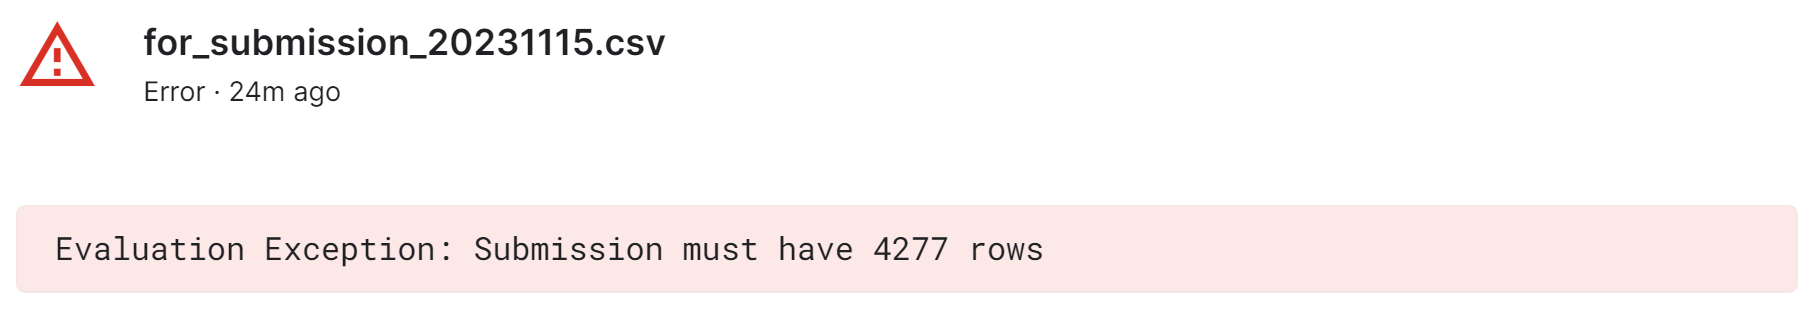

因此我決定將RoomService、FoodCourt、ShoppingMall、Spa、VRDeck的空值填入0，而不刪除

In [386]:
df = pd.read_csv("/content/train.csv")
df.drop(['Name'],axis=1,inplace=True)
df=pd.get_dummies(data=df, dtype=int, columns=['HomePlanet','CryoSleep','Destination','VIP','Transported'])
df.drop(['CryoSleep_False','VIP_False','Transported_False'],axis=1,inplace=True)
df.drop(['Cabin'],axis=1,inplace=True)
df['Age'] = df['Age'].fillna(df['Age'].median()).astype(float) #將Age強制轉換成float形式，否則未加.astype(float)則為.object無法訓練

#空值補零
df['RoomService'] = df['RoomService'].fillna(0).astype(float)
df['FoodCourt'] = df['FoodCourt'].fillna(0).astype(float)
df['ShoppingMall'] = df['ShoppingMall'].fillna(0).astype(float)
df['Spa'] = df['Spa'].fillna(0).astype(float)
df['VRDeck'] = df['VRDeck'].fillna(0).astype(float)

#資料切割
X=df.drop(['PassengerId','Transported_True'],axis=1)
y=df['Transported_True']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=100)

#模型選擇與使用
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
predictions=lr.predict(X_test)

#建立模型
import joblib
joblib.dump(lr,'Space-Titanic-LR-20231115-v2.pkl',compress=3)

#Model Using
import joblib
model_pretrained=joblib.load('Space-Titanic-LR-20231115-v2.pkl')
import pandas as pd

#調整測試資料集以符合模型
df_test=pd.read_csv("test.csv")
df_test.drop(['Name'],axis=1,inplace=True)
df_test=pd.get_dummies(data=df_test, dtype=int, columns=['HomePlanet','CryoSleep','Destination','VIP'])
df_test.drop(['CryoSleep_False','VIP_False'],axis=1,inplace=True)
df_test.drop(['Cabin'],axis=1,inplace=True)
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median()).astype(float)

#空值補零
df_test['RoomService'] = df_test['RoomService'].fillna(0).astype(float)
df_test['FoodCourt'] = df_test['FoodCourt'].fillna(0).astype(float)
df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(0).astype(float)
df_test['Spa'] = df_test['Spa'].fillna(0).astype(float)
df_test['VRDeck'] = df_test['VRDeck'].fillna(0).astype(float)

#先將PassengerId存起來
ID = df_test['PassengerId']
df_test.drop(['PassengerId'],axis=1,inplace=True)

#將測資丟進模型訓練
predictions3 = model_pretrained.predict(df_test)

#建立檔案
forSubmissionDF = pd.DataFrame()
forSubmissionDF['PassengerId'] = ID
forSubmissionDF['Transported'] = predictions3
forSubmissionDF['Transported'] = forSubmissionDF['Transported'].astype(bool)

#匯出檔案
forSubmissionDF.to_csv('for_submission_20231115(1).csv', index=False)

上傳kaggle後得到 Score:0.78887

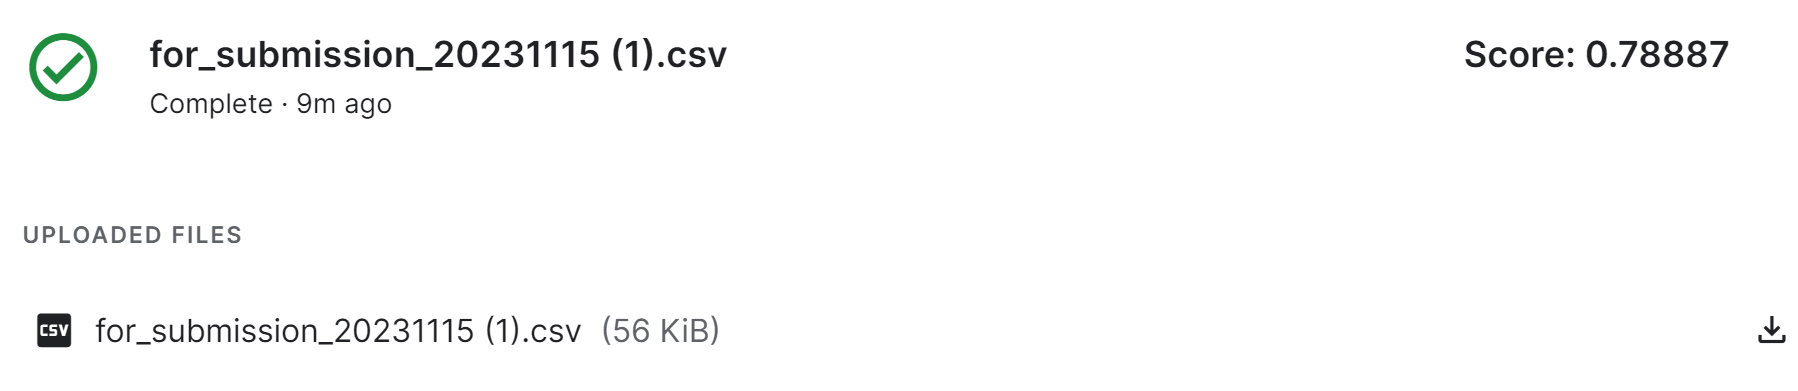

我嘗試將在原本的模型訓練時將空值資料去除(使用第一個版本的模型)，而在處理測試的資料時則將空值補0，以符合文件規定

In [391]:
#Model Using
import joblib
model_pretrained=joblib.load('Space-Titanic-LR-20231115-v1.pkl')
import pandas as pd

In [392]:
#調整測試資料集以符合模型
df_test=pd.read_csv("test.csv")
df_test.drop(['Name'],axis=1,inplace=True)
df_test=pd.get_dummies(data=df_test, dtype=int, columns=['HomePlanet','CryoSleep','Destination','VIP'])
df_test.drop(['CryoSleep_False','VIP_False'],axis=1,inplace=True)
df_test.drop(['Cabin'],axis=1,inplace=True)
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median()).astype(float)
#利用pd.isna()濾掉有空值的列
#空值補零
df_test['RoomService'] = df_test['RoomService'].fillna(0).astype(float)
df_test['FoodCourt'] = df_test['FoodCourt'].fillna(0).astype(float)
df_test['ShoppingMall'] = df_test['ShoppingMall'].fillna(0).astype(float)
df_test['Spa'] = df_test['Spa'].fillna(0).astype(float)
df_test['VRDeck'] = df_test['VRDeck'].fillna(0).astype(float)
#先將PassengerId存起來
ID = df_test['PassengerId']
df_test.drop(['PassengerId'],axis=1,inplace=True)

In [393]:
predictions2 = model_pretrained.predict(df_test)
predictions2

array([1, 0, 1, ..., 1, 1, 1])

In [394]:
#Prearesubmitfile
forSubmissionDF = pd.DataFrame()
forSubmissionDF['PassengerId'] = ID
forSubmissionDF['Transported'] = predictions2
forSubmissionDF['Transported'] = forSubmissionDF['Transported'].astype(bool)
forSubmissionDF

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [395]:
forSubmissionDF.to_csv('for_submission_20231115-success-v1.csv', index=False)

上傳kaggle後得到Score:0.78957

比套用第二個模型(空值補0)的結果更好了

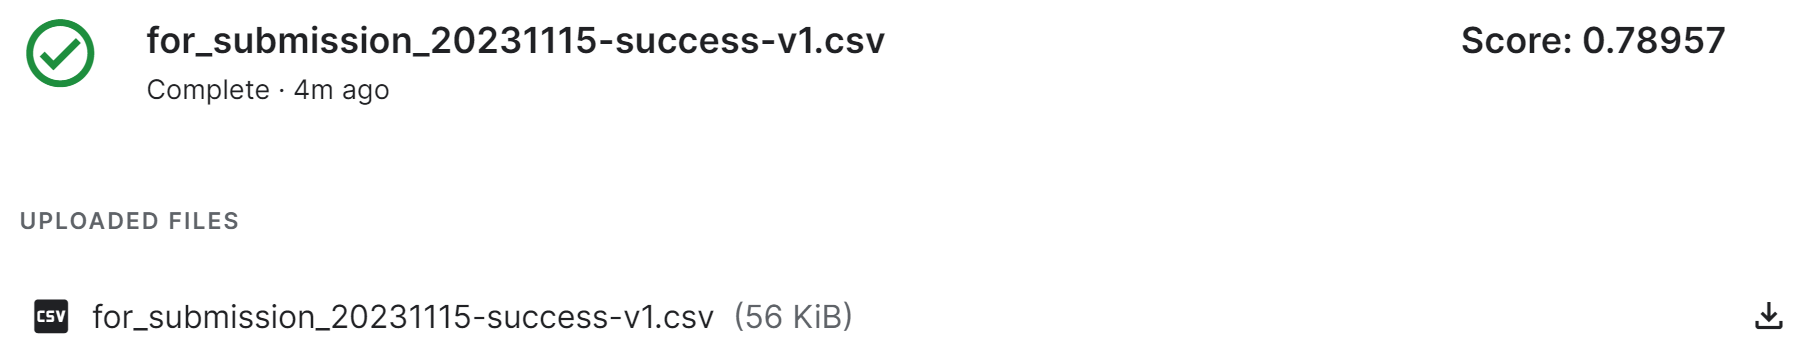

### 六、推測改善方式

由於若要將Cabin欄位處理成適合當成訓練資料的樣貌比較複雜，因此我剛開始就選擇先忽略，不過我認為說不定再加上Cabin一起訓練，可以得到更高的分數。

另外，或許將空值資料一律填補中位數，又或者套用不同的機器學習模型，也可能得到更好的結果，這些都是可以再嘗試看看的。

### 七、心得
經過這次自己的實作，我學習到很多，雖然大多是照著老師上課教的方法延伸去思考要怎麼做會更好，但跟著老師操作時都蠻容易的，一旦自己要處理全新的資料集時就會遇到許多困難，尤其是在處理空值的時候，一些型態轉換還有到底是要填補還是刪除之類的，感覺都有可能是影響結果的關鍵。

### 八、參考資料

AI生成 : 我使用了chatgpt翻譯並簡化比賽簡介，以及翻譯資料描述。

註：在我想要撰寫程式遇到不知道如何用python的語法表達時，我會先上網查詢，同時也會詢問chatgpt，修改之後才使用，而大部分是因為我對python語法的不熟悉。我不確定這樣是否算AI生成的範疇，因此註明在這裡。